#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Importing the libraries</div>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Loading the dataset</div>

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Getting the data into predictors and labels</div>

In [3]:
X, y = mnist.get("data"), mnist.get("target")

In [4]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


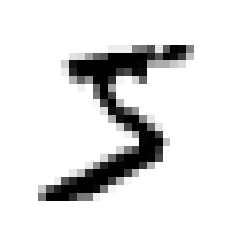

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
# Converting the values inside labels to int
y = y.astype(int)

In [7]:
y[0]

5

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Separating into training set and test set</div>

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Training a binary classifier</div>

In [9]:
# only to detect 5
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Training the model for detecting 5</div>

In [10]:
%%time
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(n_splits=3, shuffle=True, random_state=42)
clf.fit(X_train, y_train_5)

CPU times: user 13.1 s, sys: 162 ms, total: 13.2 s
Wall time: 13 s


SGDClassifier(random_state=42)

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Predict the value 5</div>

In [11]:
clf.predict([some_digit])[0]

True

<span style="color:red">This means that our model predicted value correctly</span>

#  <div style="color:white; background-color:blue; padding:20px; text-align:center; border-radius:10px">Performance Measures</div>

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Measuring Accuracy Using Cross Validation</div>

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

- <span style="color:red">Over 90% accuracy but if you observe closely you will get that only 10% of the y_train_5 is a 5.</span>
- <span style="color:red">So if the model predicts not 5 for everycase then there is 90% chance that the model is correct. Hence we get so much accuracy</span>
- **<span style="color:red">This is why we dont use cross_val_score much</span>**

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Confusion Matrix</div>

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train_5, cv=3)

- **<span style="color:red">The main moto here is to not touch test set but predict values on the trained dataset with cross_val_predict</span>**

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

- **<span style="color:red">Row = actual class
</span>**
- **<span style="color:red">column=predicted class</span>**
- **<span style="color:red">0 row and 0 column is negative</span>**

### <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Precision and Recall</div>

- Precision is the accuracy of positive predictions
`precision = tp/(tp+fp)`
- Recall is the ratio of positive instances that are correctly detected by the classifier
`recall = tp / (tp + fn)`

In [15]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [16]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">F1 Score</div>
- F1 score is the harmonic mean of precision and recall
- `f1_score = 2pr/p+r`

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Precision Recall curve</div>

In [19]:
y_scores = cross_val_predict(clf, X_train, y_train_5, cv=3, method="decision_function")

In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

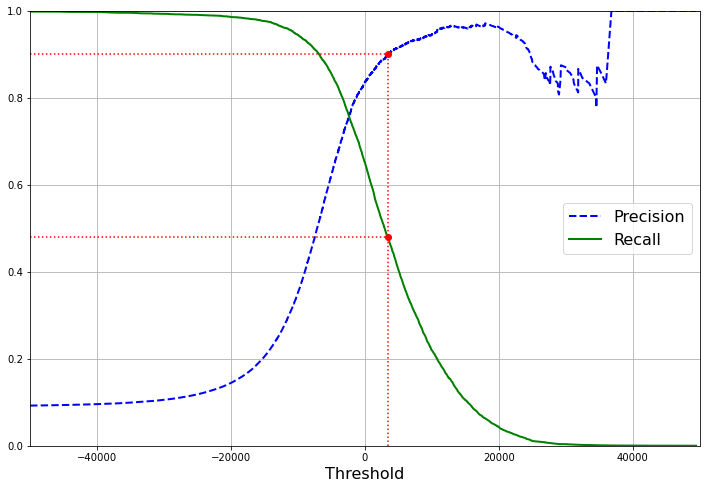

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(12, 8))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown                                            # Not shown
plt.show()

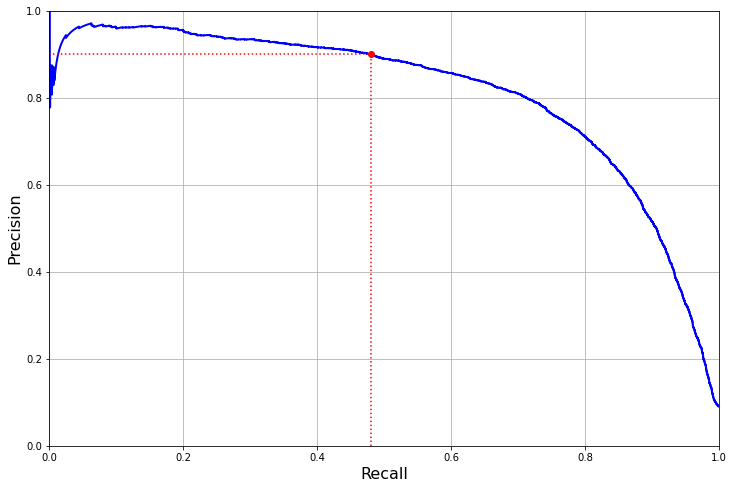

In [25]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(12, 8))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">The ROC Curve</div>

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

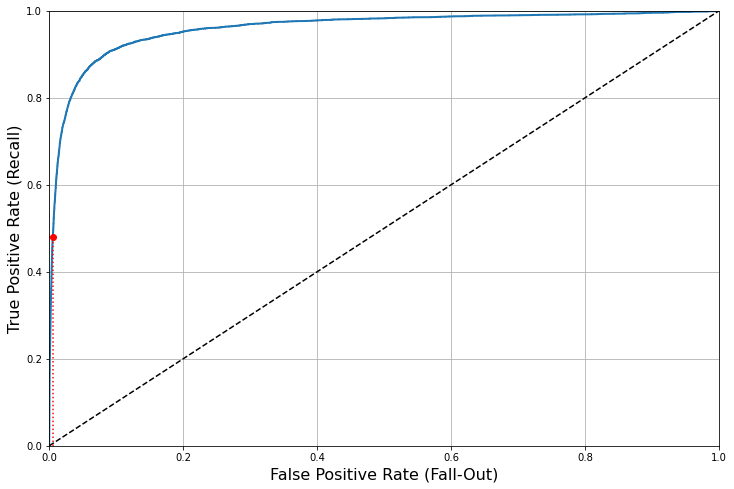

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(12, 8))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown                                   # Not shown
plt.show()

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Compare classifiers using roc auc curve</div>

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Doing same now with random forest classifier</div>

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [31]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

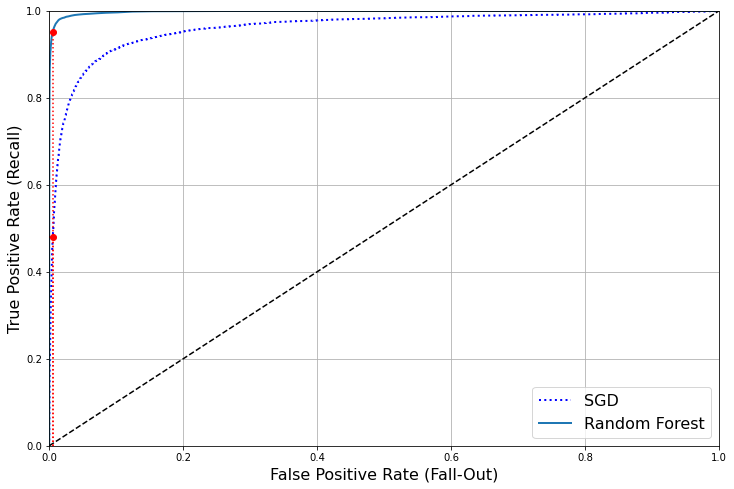

In [33]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [34]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [35]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [36]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Multiclass Classification</div>

In [38]:
%%time
# training on all ten classes i.e performing binary classification one vs all strategy
clf.fit(X_train, y_train)
clf.predict([some_digit]) # it was a 5

array([3])

In [39]:
%%time
forest_clf.fit(X_train, y_train)

CPU times: user 23.3 s, sys: 151 ms, total: 23.4 s
Wall time: 23.4 s


RandomForestClassifier(random_state=42)

In [40]:
forest_clf.predict([some_digit])

array([5])

In [41]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [42]:
%%time
# cross validation score on sgd classifier
cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")

CPU times: user 2min 54s, sys: 1.71 s, total: 2min 55s
Wall time: 2min 52s


array([0.87365, 0.85835, 0.8689 ])

### Scaling the inputs


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))

## <div style="color:white; background-color:blue; padding:20px; text-align:left; border-radius:10px">Error Analysis</div>

In [44]:
%%time
y_train_pred = cross_val_predict(clf, X_train_scaled, y_train, cv=3)

CPU times: user 7min 47s, sys: 2.94 s, total: 7min 50s
Wall time: 7min 47s


In [45]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])